# Project-1 
- Cardio Fitness Store


## Objectives: 
- Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. 

- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers

## Background: 
Cardio Fitness Store has a variety of treadmill for your specific choices
Data: the details of customers who bought the product
It is recommended to identify the key parameters that lead a customer of a specific characteristic to choose a product-the demands and requirements
The analyses will look for possible correlation between different variables present in the dataset such as fitness level, product purchased, age group, etc.

- The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

    - Product - the model no. of the treadmill
    - Age - in no of years, of the customer
    - Gender - of the customer
    - Education - in no. of years, of the customer
    - Marital Status - of the customer
    - Usage - Avg. # times the customer wants to use the treadmill every week
    - Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    - Income - of the customer
    - Miles- expected to run
- Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.


## Import Libraries

In [172]:
 #Importing the libraries necessary for the project data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # To ignore the warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To set float elements to %0.5f

sns.set_style("whitegrid") #to set the plots to dark grid background

In [173]:
cardio = pd.read_csv('CardioGoodFitness.csv') #reading the file 'CardioGoodFitness' and save it to the file cardio

In [174]:
#Looking at the first 10 observations of the dataset.
cardio.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


 ## Observations:
 - 9 variables showing various details of customer and the expectations of the customers while buying cardio equipment are given in the dataset
 - Product, Gender and Marital Status are 'string'
 - Age, Education, Usage, Fitness, Income and Miles have numerical values.
 - Gender, Product, Marital Status are categorical variables

In [175]:
# understanding the shape
cardio.shape

(180, 9)

## Observations:
 - The dataset 'cardio' has 180 rows and 9 columns

In [176]:
#data types of the dataframe
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Observations
- All columns have 180 observations 
- No missing values
- Product, Gender and Marital Status are of type objects and rest are numerical. 
- The variables Product, Marital Status, Fitness and Gender should be changed to categorical 

In [177]:
# data types
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Data preprocessing

In [178]:
#missing values
pd.DataFrame({'value':cardio['Product'], 'Missing Value?:':cardio['Product'].isna()})

,value,Missing Value?:
0,TM195,False
1,TM195,False
2,TM195,False
3,TM195,False
4,TM195,False
...,...,...
175,TM798,False
176,TM798,False
177,TM798,False
178,TM798,False


In [179]:
# missing values- colum wise
pd.DataFrame(cardio.isna().sum(), columns = ['Number of missing values'])

,Number of missing values
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


- No missing values

### Changing the types of data to category

In [180]:
# Changing the datatypes of Fitness, Product, Marital Status and Gender to 'categorical' variable
cardio.Fitness = cardio.Fitness.astype('category') #Fitness
cardio.Product = cardio.Product.astype('category') #Product
cardio.MaritalStatus = cardio.MaritalStatus.astype('category') #MaritalStatus
cardio.Gender = cardio.Gender.astype('category') #Gender

In [181]:
#Checking if the changes have been made correctly 
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.3 KB


## Observations
   - After the modifications: Fitness, Product, Marital Status and Gender are categorical variables
   - Rest of the variables are numerical

In [182]:
# statistical summary of cardio dataset.
cardio.describe(include='all') #to include all variables of the dataset cardio

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00000,180,180.00000,180,180.00000,180.00000,180.00000,180.00000
unique,3,nan,2,nan,2,nan,5.00000,nan,nan
top,TM195,nan,Male,nan,Partnered,nan,3.00000,nan,nan
freq,80,nan,104,nan,107,nan,97.00000,nan,nan
mean,NaN,28.78889,NaN,15.57222,NaN,3.45556,nan,53719.57778,103.19444
std,NaN,6.94350,NaN,1.61705,NaN,1.08480,nan,16506.68423,51.86360
min,NaN,18.00000,NaN,12.00000,NaN,2.00000,nan,29562.00000,21.00000
25%,NaN,24.00000,NaN,14.00000,NaN,3.00000,nan,44058.75000,66.00000
50%,NaN,26.00000,NaN,16.00000,NaN,3.00000,nan,50596.50000,94.00000
75%,NaN,33.00000,NaN,16.00000,NaN,4.00000,nan,58668.00000,114.75000


## Observations
- All rows contain 180 entries
- 'Product' contains 3 unique entries --> 3 different products
- 'Fitness' contains 5 unique categories--> 5 different levels of fitness
- Detailed statistical analysis to be discussed in the next section.

## Exploratory Data Analysis
### Univariate analysis:
 First we look at the (univariate) distribution of each variables in the data set which contains 4 categorical and 5 numerical variables

In [183]:
# univariate analysis - function- boxplot and histplot
def univariate_analysis_hist_box(plot_choose, figsize = (6,6), bins= None):
    f2, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, sharex= True, gridspec_kw = {'height_ratios':(.3,.7)}, figsize=figsize)#subplots histogram and boxplots
    sns.boxplot(plot_choose, ax= ax_box1, showmeans = True, color = 'green') #boxplot
    sns.distplot(plot_choose, kde = False, ax= ax_hist1, bins= bins) #histogram
    ax_hist1.axvline(np.mean(plot_choose), color= 'red', linestyle=":") #histogram mean
    ax_hist1.axvline(np.median(plot_choose), color= 'blue', linestyle="-") #histogram median
    plt.rc('xtick', labelsize= 20) #x tick size
    plt.rc('ytick', labelsize=20) #ytick size
    ax_box1.xaxis.label.set_size(20)# x label size of boxplot
    ax_hist1.xaxis.label.set_size(20) #x label size of histogram

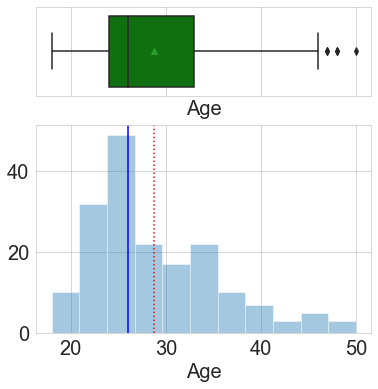

In [184]:
univariate_histogram_box(cardio['Age']) # plots both histogram and box plot of age which displays the features mean and median

## Observations: 
- The distribution of Age is right skewed spanning from 18 to 50
- Majority of the customers belong to age ~25
- There are a few outliers for the Age variable
- Mean=28.7 which is greater than median=26.0


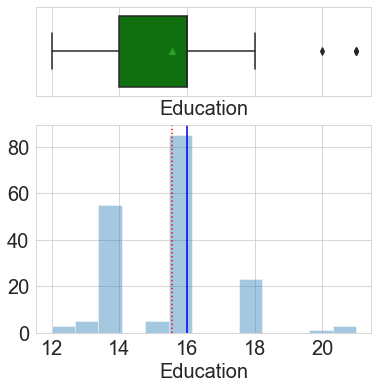

In [185]:
univariate_analysis_hist_box(cardio['Education']) # plots both histogram and box plot of education which displays the features mean and median

## Observations: 
- The distribution of Education is only slightly skewed to left.
- The education levels spans from 12 to 22 years
- Majority of the customers have education of around 16 years. There are 3 peaks two others at 14 and 18 but smaller 
- There are couple of outliers for the Education variable
- Mean=15.57 and median=16.0 is very close and therefore not very much skewed.

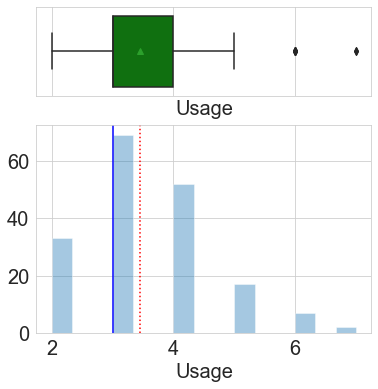

In [186]:
univariate_analysis_hist_box(cardio['Usage']) # plots both histogram and box plot of usage which displays the features mean and median

## Observations: 
- The distribution of Usage is right skewed
- It can be seen that the customers plan to use the machine 2-7 times per week.
- Majority of the customers plan to use the machine 3 times per week
- There are a couple of outliers for the Usage variable
- Mean=3.4 and median=3

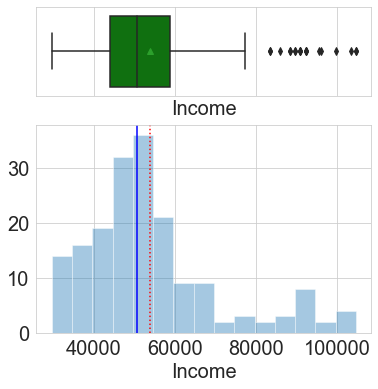

In [187]:
univariate_analysis_hist_box(cardio['Income']) # plots both histogram and box plot of income which displays the features mean and median

## Observations: 
- The distribution of Income is right skewed 
- The min income of customer group is 30000 and max is 104581.
- Majority of the customers having income around 50000
- There are many outliers for the Income variable
- Mean=53000 is only slightly higher than median=50000 

##### Income and age can possibly have correlation

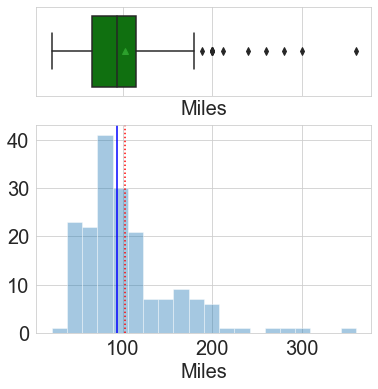

In [188]:
univariate_analysis_hist_box(cardio['Miles']) # plots both histogram and box plot of Miles which displays the features mean and median

## Observations: 
- The distribution of Miles per week is right skewed 
- The distribution spans from 21 to 360 miles per week
- Majority of the customers plan to run around 75 miles per week
- There are many outliers for the Income variable
- Mean=103 is only slightly higher than median=94

##### Usage and miles can have a positive correlation. Customers who uses more times per week are expected to run more miles.

In [189]:
def univariate_analysis_bar(plot_choose):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(plot_choose) #countplot
    
    col_tot = len(plot_choose) #total length of the column
    for per in ax.patches:
        percentage = '{:.2f}%'.format(100 * per.get_height()/col_tot) # to find the percentage in each individual category of the variable
        x = per.get_x() + per.get_width() / 2 -0.05 #width of the plot
        y = per.get_y() + per.get_height()          #height of the plot
        ax.annotate(percentage, (x,y), size =15) #annotate values-percentages on the bar plot
        
    plt.rc('xtick', labelsize=20) #size of x values
    plt.rc('ytick', labelsize=20) #size of y values
    ax.xaxis.label.set_size(20)# x label size of plot
    ax.yaxis.label.set_size(20)# y label size of plot
    

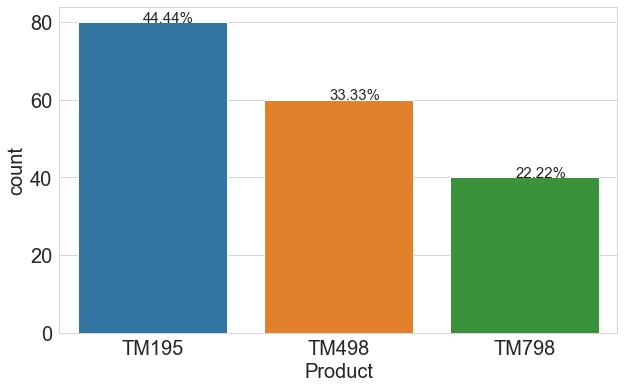

In [190]:
univariate_analysis_bar(cardio['Product']) # bar chart of Product

## Observations
- There are 3 different products TM195, TM498 and TM798
- Highest number of customer prefer TM195 and least for TM798
##### Will be interesting to look at the profile of customer who wish to buy each product.

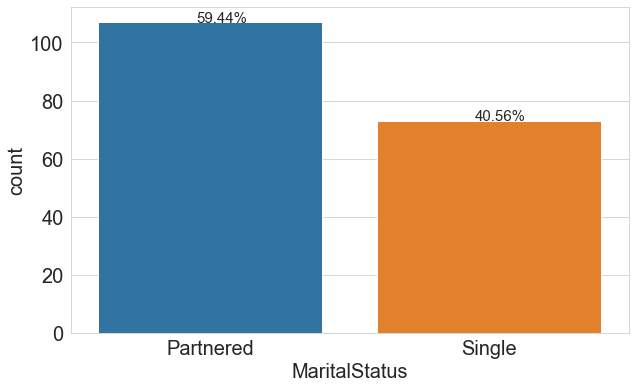

In [191]:
univariate_analysis_bar(cardio['MaritalStatus']) # bar chart of MaritalStatus

## Observations
Out of the 180 customers, 40% are single and rest are partnered.

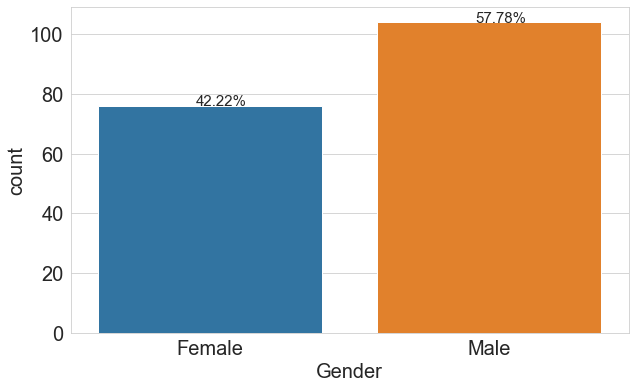

In [192]:
univariate_analysis_bar(cardio['Gender']) # bar chart of Gender

## Observations
- 42% are female and 57% are male

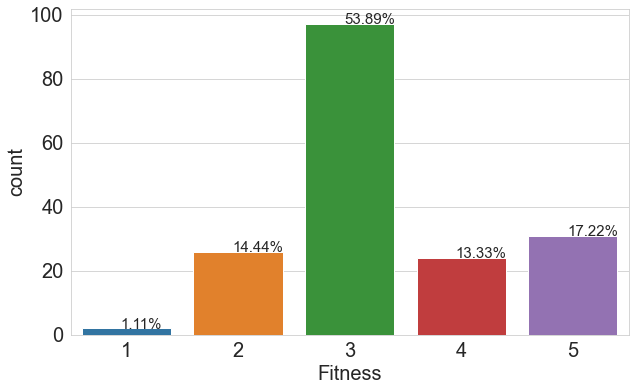

In [193]:
univariate_analysis_bar(cardio['Fitness']) # bar chart of Fitness

## Observations: 
- There are 5 different levels of fitness 1-5 (1-very unfit to 5-very fit)
- Most of the customers are of level 3
- only 1.11% of the customers are of level 1
##### It will be interesting to find the correlation of fitness level with usage, miles and product

In [194]:
#quantile of the dataset
cardio.quantile([.1, .25, .5, .75],  axis = 0) 

,Age,Education,Usage,Income,Miles
0.10000,22.00000,14.00000,2.00000,35247.00000,53.00000
0.25000,24.00000,14.00000,3.00000,44058.75000,66.00000
0.50000,26.00000,16.00000,3.00000,50596.50000,94.00000
0.75000,33.00000,16.00000,4.00000,58668.00000,114.75000


In [195]:
cardio.Fitness.unique() # unique categories of fitness levels, 5-very fit and 1-unfit

[4, 3, 2, 1, 5]
Categories (5, int64): [4, 3, 2, 1, 5]

## Observations
-Fitness levels 1 to 5

In [196]:
# range of each numerical variable in the dataset
cardio_numerical = cardio.select_dtypes(include=["int64","float64"]) # selecting numerical columns to calculate their range
Range_cardio = cardio_numerical.max() - cardio_numerical.min() #calculation of range

Range_cardio

Age             32
Education        9
Usage            5
Income       75019
Miles          339
dtype: int64

## Observations:
 - The range values of different numerical variables are shown. 

In [197]:
cardio.var() # variance of the variables in the dataset

Age                48.21217
Education           2.61487
Usage               1.17678
Income      272470624.14475
Miles            2689.83349
dtype: float64

In [198]:
cardio.quantile(0.75) - cardio.quantile(0.25) # IQR of the  variables in the dataset

Age             9.00000
Education       2.00000
Usage           1.00000
Income      14609.25000
Miles          48.75000
dtype: float64

In [199]:
# to understand the skewness of each variable in the dataset
skewed_cardio = cardio_numerical.apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
skewed_cardio 

Miles       1.71009
Income      1.28099
Age         0.97396
Usage       0.73332
Education   0.61710
dtype: float64

In [200]:
# to identify the variables that are highly skewed >0.7
skewness_high=skewed_cardio[abs(skewed_cardio)>0.7]
skewness_high

Miles    1.71009
Income   1.28099
Age      0.97396
Usage    0.73332
dtype: float64

## Observation:
- All right skewed.
- Miles, Income, Age and Usage are the highest skewed distributions in the lot

In [201]:
# To understand the outliers in Income
from scipy import stats
z = np.abs(stats.zscore(cardio['Income']))
print(z>2)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True False  T

## Observations
- The variable Income in dataset cardio seemed to have a lot of outliers. Out of the 180 entries, z-score of 16 entries is more than 2 which accounts for the outliers.

### Multivariate analysis

In [202]:
# covariance of each variable with the other
cardio.cov()

,Age,Education,Usage,Income,Miles
Age,48.21217,3.14941,0.11347,58844.46344,13.18653
Education,3.14941,2.61487,0.69317,16704.71782,25.77079
Usage,0.11347,0.69317,1.17678,9303.04258,42.70981
Income,58844.46344,16704.71782,9303.04258,272470624.14475,465265.36189
Miles,13.18653,25.77079,42.70981,465265.36189,2689.83349


In [203]:
# To find the correlation of each variable with the other
cardio.corr()

,Age,Education,Usage,Income,Miles
Age,1.00000,0.28050,0.01506,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.51954,0.75913
Income,0.51341,0.62583,0.51954,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.54347,1.00000


In [204]:
# To find the correlations with correlation index higher than 0.5
cardio.corr()>0.5 

,Age,Education,Usage,Income,Miles
Age,True,False,False,True,False
Education,False,True,False,True,False
Usage,False,False,True,True,True
Income,True,True,True,True,True
Miles,False,False,True,True,True


## Observation:
- Some variables seem to have a good correlation
- Need a better visualization for easier analysis

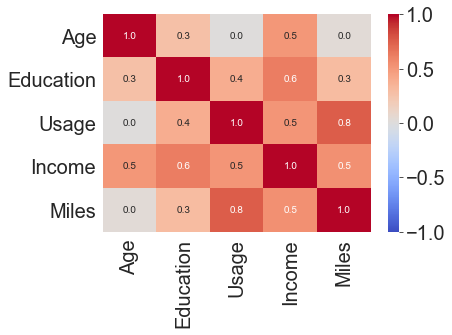

In [205]:
# heatmap-- This is for numerical variables of dataset cardio
sns.heatmap(cardio.corr(), 
            annot=True,
            cmap='coolwarm',
        fmt=".1f", 
            vmin=-1,vmax=1)
plt.show()

## Observations: 
- High correlations (>0.6) between:
    Usage-Miles, 
    Income-Education
- Fairly good correlation (0.5) between:
    Age-Income, 
    Usage-Income, 
    Income-Miles


<Figure size 360x360 with 0 Axes>

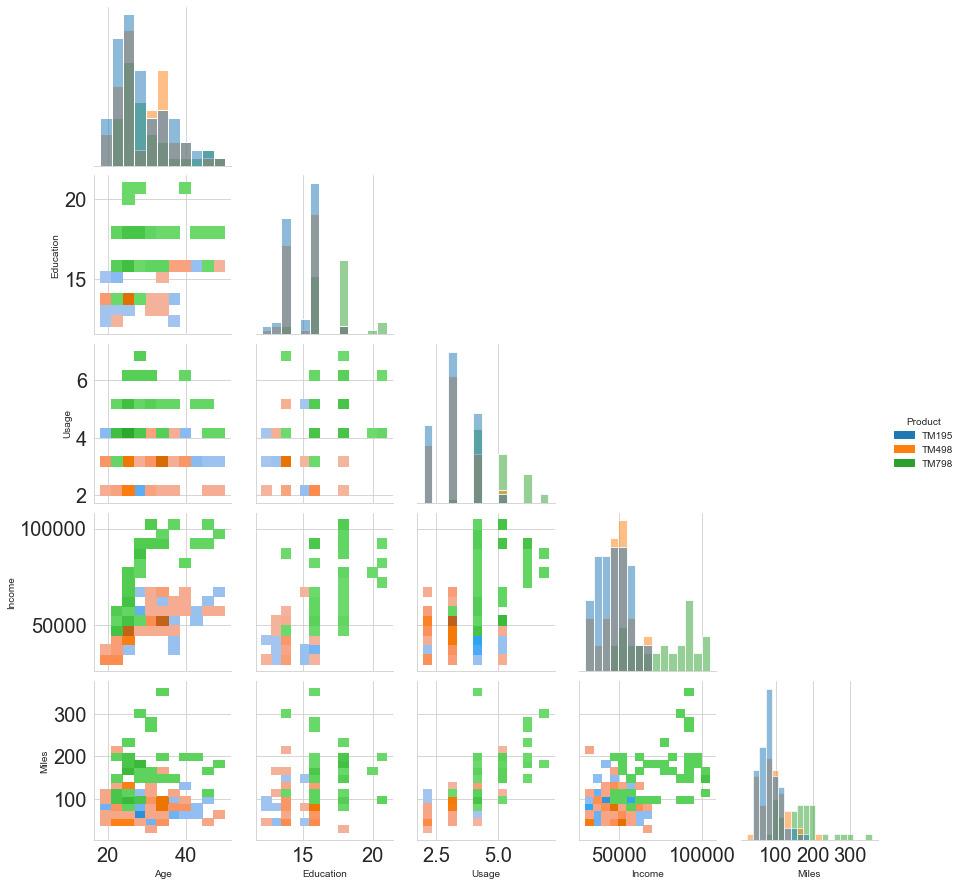

In [206]:
# Bivariate scatter plot
plt.figure(figsize=(5,5))
ax = sns.pairplot(cardio, kind='hist', corner=True, hue='Product') #pairplot 
plt.rc('xtick', labelsize=20) #size of x values
plt.rc('ytick', labelsize=20) #size of y values


plt.show()

## Observations
   - Similar observations as that of heatmap

#### This data is more useful to understand the kind of choices a customer with certain characteristics would make
#### To understand the above mentioned aspect, we explore in detail the correlations and the product-wise details
##### To understand the characteristics of the customers who bought each product,  we can analyse each product based on customer characteristics or a Customer Profile

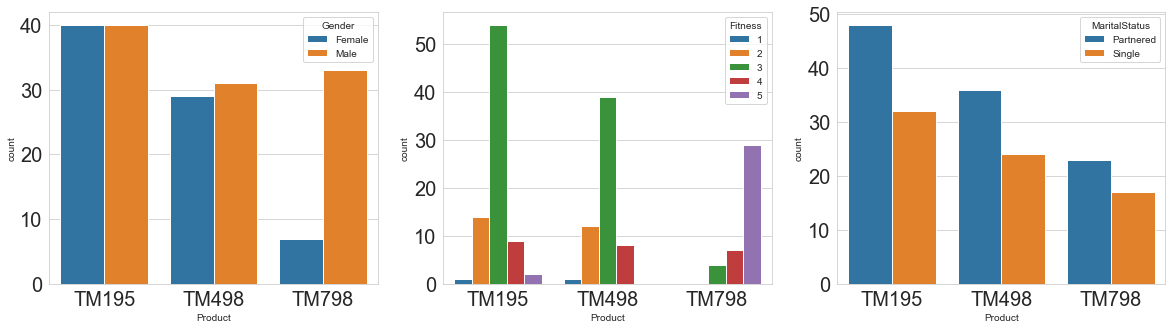

In [207]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(cardio['Product'], hue = cardio['Gender']) #plot of various products 


#count plots showing the distrubution of a categorical with respect to another categorical variable
#subplots are created to display the plots

plt.subplot(1,3,2)
sns.countplot(cardio['Product'], hue = cardio['Fitness']) #plot of various products at various fitness levels

plt.subplot(1,3,3)
sns.countplot(cardio['Product'], hue = cardio['MaritalStatus'])


#plot of various products purchased by customers vs Marital Status
plt.show()



## Observations:
#### Distribution of Product depending on Gender
- Product purchased has close correlation with gender
- Around same number of male and female customers buy TM195
- Significantly higher number of male customers buy TM798 than female customers


#### Distribution of Product depending on Fitness level
- Customers choose the product based on their fitness level
- While TM195 is used irrespective of the fitness level, TM798 is only used by customers with fitness levels 3-5 and TM498 from levels 1 to 4.
- Among those who prefer products TM195 and TM498, considerably higher number of customers are of fitness level 3
- Among the customers who purchased TM798, higher number are of fitness level 5.


#### Distribution of Product depending on Marital Status
- Customers who are ‘partnered’ buy products more than those who are ‘single’


#### To analyse the customer profile, a product-wise dataset is created
- This also makes it easier to do the bivariate analysis with the variable product and others. 

In [208]:
 # Creating a dataset for product TM195
cardio_TM195 = cardio[cardio['Product']=='TM195']
cardio_TM195.describe()

,Age,Education,Usage,Income,Miles
count,80.00000,80.00000,80.00000,80.00000,80.00000
mean,28.55000,15.03750,3.08750,46418.02500,82.78750
std,7.22145,1.21638,0.78262,9075.78319,28.87410
min,18.00000,12.00000,2.00000,29562.00000,38.00000
25%,23.00000,14.00000,3.00000,38658.00000,66.00000
50%,26.00000,16.00000,3.00000,46617.00000,85.00000
75%,33.00000,16.00000,4.00000,53439.00000,94.00000
max,50.00000,18.00000,5.00000,68220.00000,188.00000


In [209]:
# Checking the skewness of each variable with the first product
cardio_TM195.skew()

Age          0.97883
Education   -0.20309
Usage        0.16913
Income       0.17662
Miles        1.00891
dtype: float64

## Observations:
- All variables except Education are right skewed

In [210]:
# Creating a dataset for product TM498
cardio_TM498 = cardio[cardio['Product']=='TM498']
cardio_TM498.describe()

,Age,Education,Usage,Income,Miles
count,60.00000,60.00000,60.00000,60.00000,60.00000
mean,28.90000,15.11667,3.06667,48973.65000,87.93333
std,6.64525,1.22255,0.79972,8653.98939,33.26314
min,19.00000,12.00000,2.00000,31836.00000,21.00000
25%,24.00000,14.00000,3.00000,44911.50000,64.00000
50%,26.00000,16.00000,3.00000,49459.50000,85.00000
75%,33.25000,16.00000,3.25000,53439.00000,106.00000
max,48.00000,18.00000,5.00000,67083.00000,212.00000


In [211]:
# Checking the skewness of each variable with the first product
cardio_TM498.skew()

Age          0.71316
Education   -0.11476
Usage        0.49487
Income      -0.01055
Miles        1.09007
dtype: float64

## Observations:
- Age, Usage and Miles are right skewed and rest left skewed

In [212]:
# Creating a dataset for product TM195
cardio_TM798 = cardio[cardio['Product']=='TM798']
cardio_TM798.describe()

,Age,Education,Usage,Income,Miles
count,40.00000,40.00000,40.00000,40.00000,40.00000
mean,29.10000,17.32500,4.77500,75441.57500,166.90000
std,6.97174,1.63907,0.94699,18505.83672,60.06654
min,22.00000,14.00000,3.00000,48556.00000,80.00000
25%,24.75000,16.00000,4.00000,58204.75000,120.00000
50%,27.00000,18.00000,5.00000,76568.50000,160.00000
75%,30.25000,18.00000,5.00000,90886.00000,200.00000
max,48.00000,21.00000,7.00000,104581.00000,360.00000


In [213]:
# Checking the skewness of each variable with the first product
cardio_TM798.skew()

Age          1.44847
Education    0.40130
Usage        0.66943
Income      -0.07965
Miles        1.13403
dtype: float64

## Observations:
- All variables except Income are right skewed

In [214]:
# To group the dataset by Fitness level and gender and to calculate the mean value
Product_m = cardio.groupby([cardio['Product'],cardio['Fitness'],cardio['Gender']]).mean()
Product_m

Age  Education   Usage      Income     Miles
Product Fitness Gender                                                  
TM195   1       Female      nan        nan     nan         nan       nan
                Male   23.00000   16.00000 3.00000 38658.00000  47.00000
        2       Female 29.50000   14.90000 2.30000 46958.10000  50.00000
                Male   25.25000   14.00000 2.75000 46332.75000  47.00000
        3       Female 27.57692   15.19231 3.03846 45305.07692  79.19231
                Male   29.60714   15.00000 3.21429 47916.42857  85.71429
        4       Female 34.00000   14.66667 3.00000 49649.00000 100.33333
                Male   26.50000   15.16667 3.83333 42637.50000 128.50000
        5       Female 24.00000   16.00000 5.00000 44343.00000 188.00000
                Male   34.00000   16.00000 4.00000 51165.00000 169.00000
TM498   1       Female 31.00000   18.00000 2.00000 65220.00000  21.00000
                Male        nan        nan     nan         nan       nan
        2       Female 27.50000   14.66667 2.83333 45480.00000  61.83333
                Male   29.00000   15.00000 2.50000 45480.00000  47.50000
        3       Female 30.16667   15.16667 3.16667 50975.50000  88.94444
                Male   28.57143   15.19048 3.09524 49053.42857  94.80952
        4       Female 26.25000   15.50000 3.75000 43774.50000 135.00000
                Male   29.00000   14.25000 3.25000 51165.00000 116.75000
        5       Female      nan        nan     nan         nan       nan
                Male        nan        nan     nan         nan       nan
TM798   1       Female      nan        nan     nan         nan       nan
                Male        nan        nan     nan         nan       nan
        2       Female      nan        nan     nan         nan       nan
                Male        nan        nan     nan         nan       nan
        3       Female 26.00000   21.00000 4.00000 69721.00000 100.00000
                Male   24.66667   16.66667 4.00000 67265.00000 102.00000
        4       Female 23.00000   18.00000 5.00000 53536.00000 100.00000
                Male   29.16667   17.83333 4.83333 80303.50000 163.33333
        5       Female 28.00000   17.20000 5.20000 78436.00000 212.00000
                Male   30.25000   17.12500 4.79167 75775.41667 172.08333

### Following are the set of 3 plots for each variable in each small sub dataset based on products
- This is also same as plotting the 'Age' column from set cardio when Product =TM798. Instead we chose to create a dataset based on each product i.e., cardio_TM798 


In [215]:
# A function is defined to plot the distribution of each variables product-wise

def customer_profile(plot_choose_c, xlim1,xlim2): # 3 arguments: column name, min and max values of x-axis
    plt.figure(figsize=(20,5)) #figure size 20x5
    plt.subplot(1,3,1) # Dividing to three subplots 1 row and 3 columns
    sns.distplot(cardio_TM798[plot_choose_c], color='blue',kde=False)
    plt.tick_params(axis='both', labelsize=20)
    plt.xlabel(plot_choose_c, size=20)
    plt.axvline(np.mean(cardio_TM798[plot_choose_c]), color='black', linestyle='--') 
    plt.title('TM798', size=20)
    plt.tick_params(axis='both', labelsize=20)
    plt.xlim(xlim1, xlim2) # to set the x values same for all three plots, xlim is fixed for all three from 10 to 60. This makes it easier for comparison


    plt.subplot(1,3,2)
    sns.distplot(cardio_TM498[plot_choose_c], color='green', kde=False)
    plt.axvline(np.mean(cardio_TM798[plot_choose_c]), color='black', linestyle='--')
    plt.title('TM498', size=20)
    plt.xlabel(plot_choose_c, size=20)
    plt.tick_params(axis='both', labelsize=20)
    plt.xlim(xlim1, xlim2)

    plt.subplot(1,3,3)
    sns.distplot(cardio_TM195[plot_choose_c], color='red', kde=False)
    plt.axvline(np.mean(cardio_TM798[plot_choose_c]), color='black', linestyle='--')
    plt.tick_params(axis='both', labelsize=20)
    plt.title('TM195',size=20)
    plt.xlabel(plot_choose_c, size=20)

    plt.xlim(xlim1, xlim2)
    plt.show()

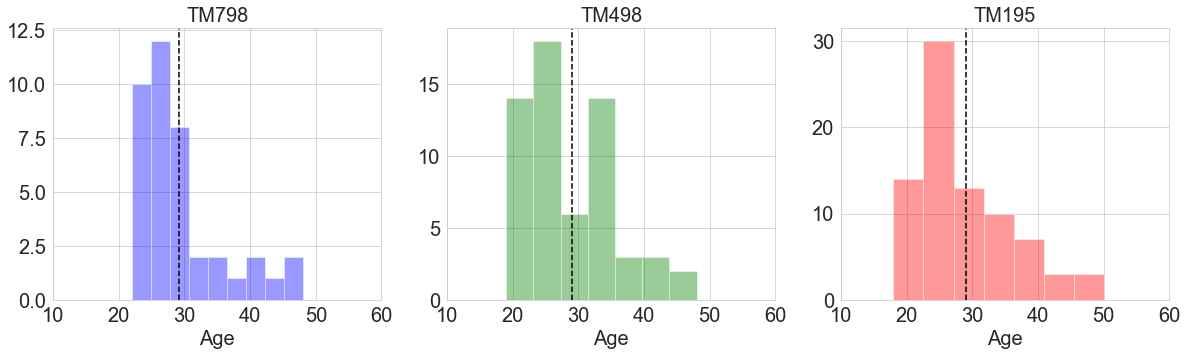

In [216]:
customer_profile('Age',10,60)

## Observations:
- The distribution of the age of customers is shown with mean marked in black lines in each plot.
- Age does not seem to have an influence on the preference of the products bought by the customers.

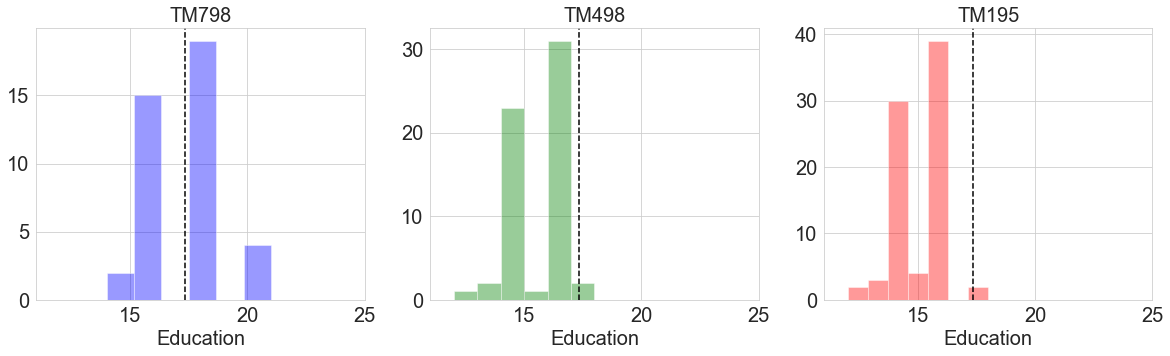

In [217]:
# Education
customer_profile('Education',11,25)

## Observations
- The distribution of the number of years of education of the customers who chose each product is displayed. 
- TM195 and TM498--> distribution looks the same with the maximum number of years at 18
- TM798 --> Education level of 21 also purchased this product


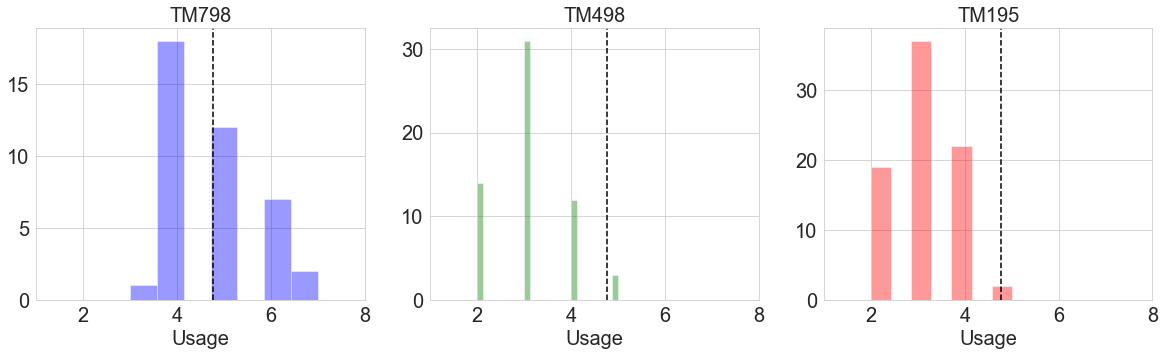

In [218]:
#Usage
customer_profile('Usage',1,8)

## Observations:
- The distribution of the usage, ie, the number of times the customer will be using each product in a week is displayed
- Maximum usage per week: TM195 and TM498--> 5 but for TM798--> 7
- Customers who wish to use the product more invest on TM798
##### This needs to be checked for correlation with fitness level to make meaningful recommendations

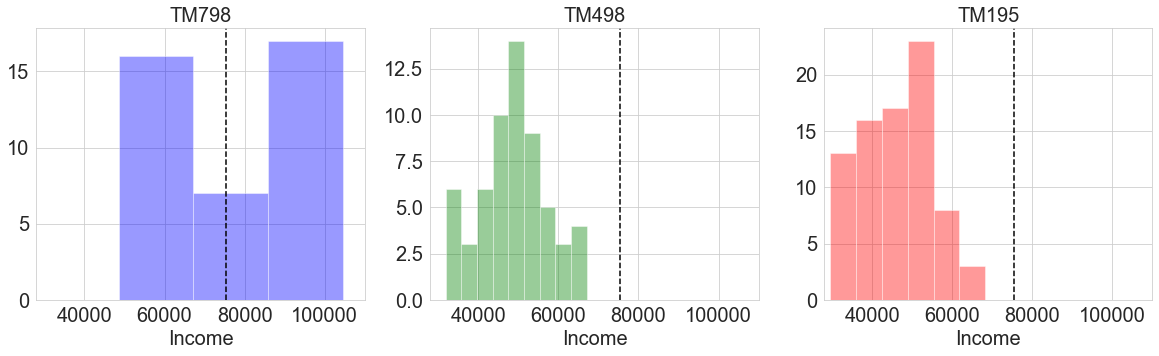

In [219]:
#Income
customer_profile('Income',28000,110000)


## Observations
- The distribution of income of the customer for each product is shown
- TM798 is purchased by customers whose income is high
- TM798 may be have the highest price among the three products.
- The other two products are bought by customers with almost the same income range


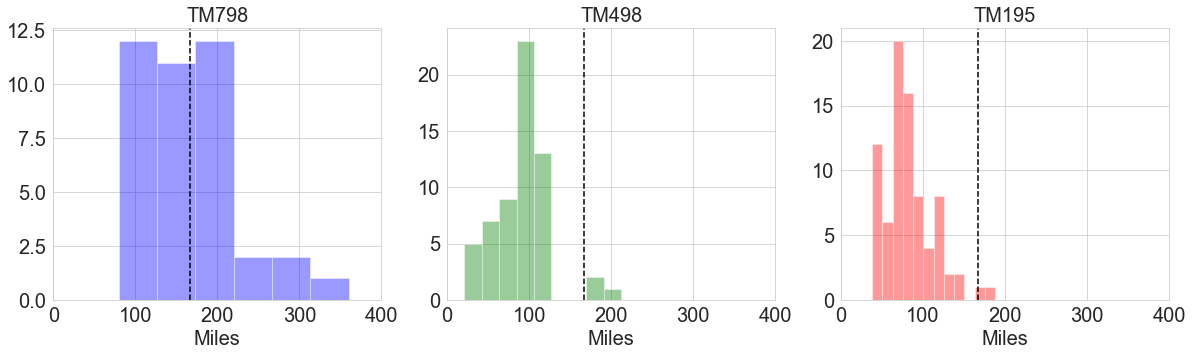

In [220]:
#Miles
customer_profile('Miles',0,400)


## Observations
- The distribution of the Miles expected to run by the customer  is displayed
- Customers who expect to run more miles bought TM798 than those who bought the other two products
- Customers who expect to run less than 75 miles minimum bought TM498 and TM195 and those who expect to run min of 75 miles bought TM798.


In [221]:
# Now, for caegorical variables,another function is defined
def customer_profile_cat(plot_select_cat):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    sns.countplot(cardio_TM798[plot_select_cat]) #count plot for TM798
    plt.xlabel(plot_select_cat, size=20)
    plt.ylabel(plot_select_cat, size=20)
    plt.title('TM798', size=20)


    plt.subplot(1,3,2)
    sns.countplot(cardio_TM498[plot_select_cat]) #count plot for TM498
    plt.xlabel(plot_select_cat, size=20)
    plt.ylabel(plot_select_cat, size=20)
    plt.title('TM498', size=20)



    plt.subplot(1,3,3)
    sns.countplot(cardio_TM195[plot_select_cat]) #count plot for TM195
    plt.xlabel(plot_select_cat, size=20)
    plt.ylabel(plot_select_cat, size=20)
    plt.title('TM195', size=20)


    plt.show()

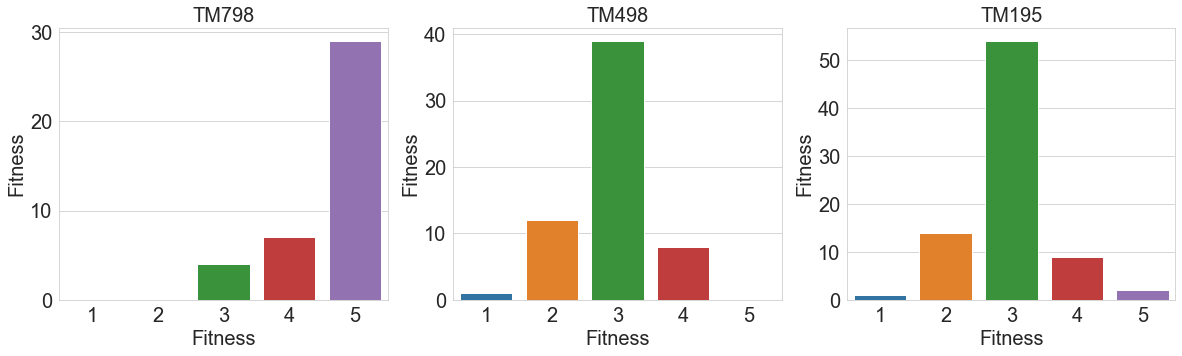

In [222]:
#Fitness
customer_profile_cat('Fitness')

## Observations
- Purchase is highly dependent on the fitness levels
- Customers buying TM798 should be of level 3 and more in the fitness level whereas can be of any level to buy TM195 and till level 4 for TM498
- For TM798: more number of customers are with fitness level 5
- For both TM498 and TM195: the fitness level of 3 is highly observed 

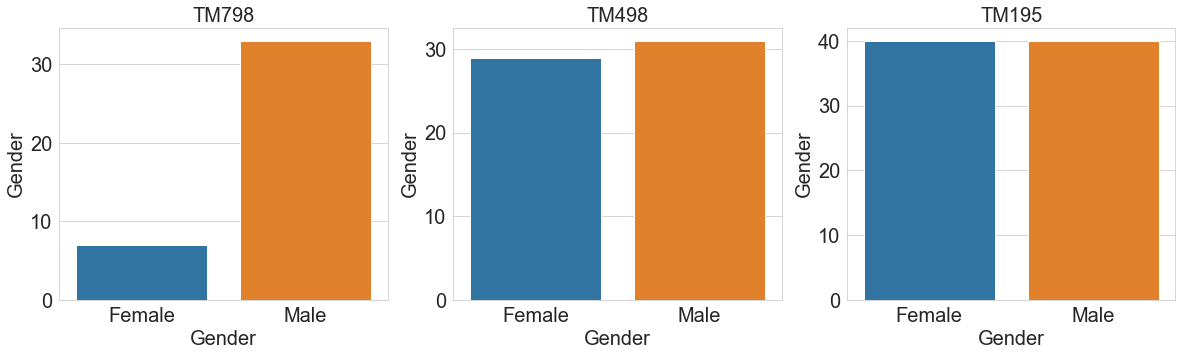

In [223]:
#Gender
customer_profile_cat('Gender')

## Observations:
- More male customers buy TM798 than female. 
- For TM498 and TM195, there doesnt seem to be much of a difference between male and female customers however, with male customers slightly leading for TM498

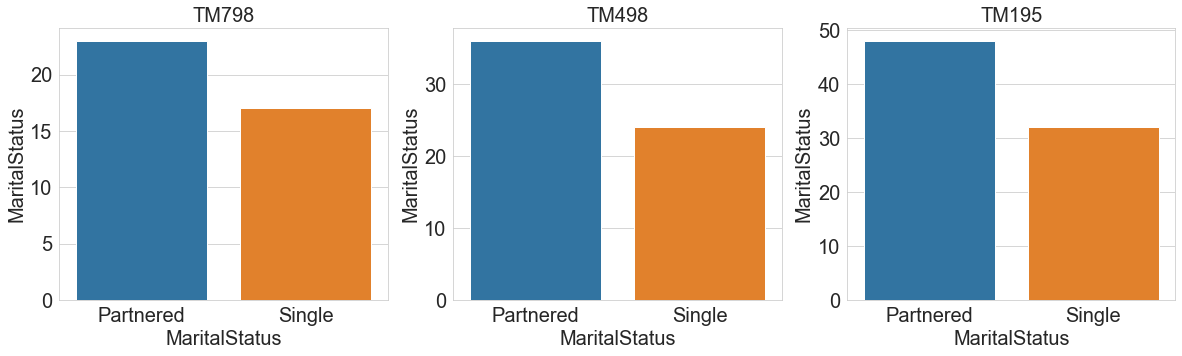

In [224]:
#Marital Status
customer_profile_cat('MaritalStatus')

## Observations:
- More 'Partnered' customers buy the products than 'single' ones.


#### Considering the variables that had good and fairly good correlations, the further exploration will look into additional factors those add to the correlations. 
#### It is clear from the analyses above that, customers choose their product based on fitness level. Additionally, partnered customers tend to buy more than single ones. 
#### Further, we need to explore the data based on gender

(0.0, 8.0)

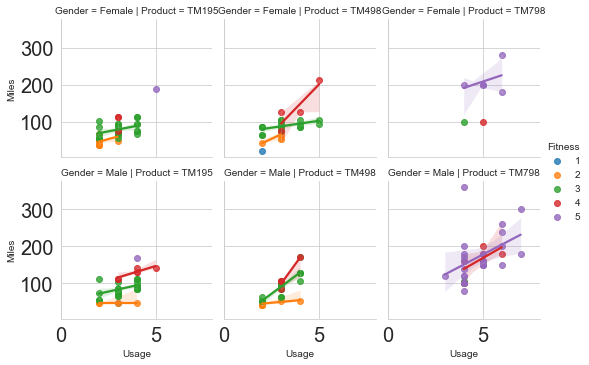

In [225]:
# Exploring the correlation of usage-miles with other variables 
sns.lmplot(x='Usage',y='Miles', hue='Fitness',col='Product',row='Gender',data=cardio,size = 2.5)
plt.xlim(0,8)


## Observations:
- Usage and miles seem to be an obvious correlation suggesting that if one uses the product more in a week, one might have run more miles. 
- Female customers with fitness level 5 who plan to use the product more and are expected to run more miles are to buy TM798
- Male customers with fitness level 4 and 5 who plan to use the product and expected to run more miles are to buy TM798


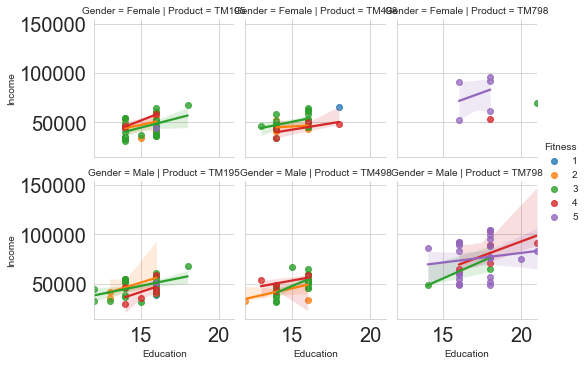

In [226]:
# Exploring the correlation of education-income with other variables. 
sns.lmplot(x='Education',y='Income', hue='Fitness',col='Product',row='Gender',data=cardio, size = 2.5)


## Observations:
- Both Male and Female Customers with more number of years of education and more income and with higher fitness levels bought TM798.
-

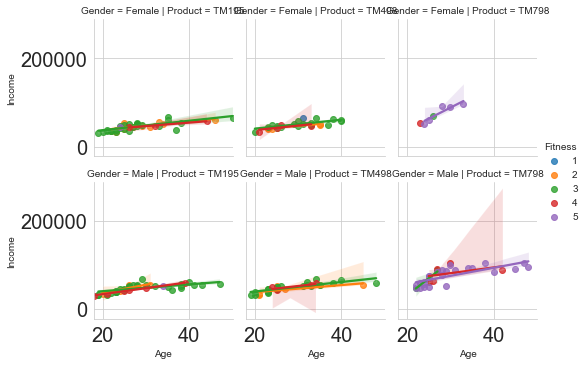

In [227]:
# Exploring the correlation of age-income with other variables. 
sns.lmplot(x='Age',y='Income', hue='Fitness',col='Product',row='Gender',data=cardio,size=2.5)


## Observations:
- Age and income are to be positively correlated. 
- Both male and female customers with high income and high fitness level bought TM798.
- For the other two products, not much of a difference is observed


(1.0, 8.0)

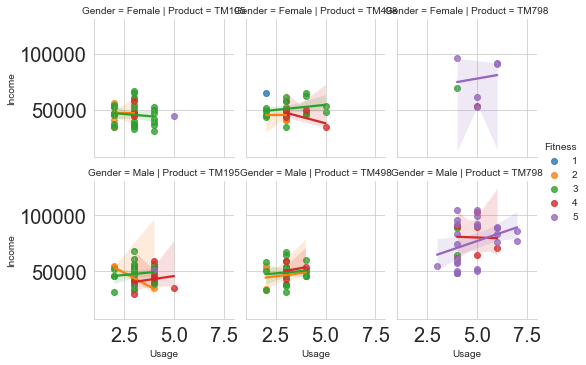

In [228]:
# Exploring the correlation of usage-income with other variables. 
sns.lmplot(x='Usage',y='Income', hue='Fitness',col='Product',row='Gender',data=cardio, size=2.5)
plt.xlim(1,8)


## Observations:
- Both male and female customers with high income and high fitness level and who plan to use the equipment more bought TM798.

- For TM498, female customers plan to use the product more times per week than male customers


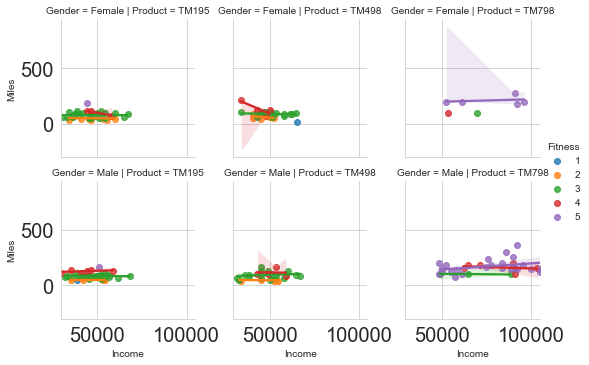

In [229]:
# Exploring the correlation of miles-fitness with other variables. 
sns.lmplot(x='Income',y='Miles', hue='Fitness',col='Product',row= 'Gender', data=cardio, size =2.5)


## Observations:
- Customers with high income and with high fitness level (5) are likely to run more miles with TM798

- However, this observation is not thoroughly true with TM498 and TM195 for the same income levels


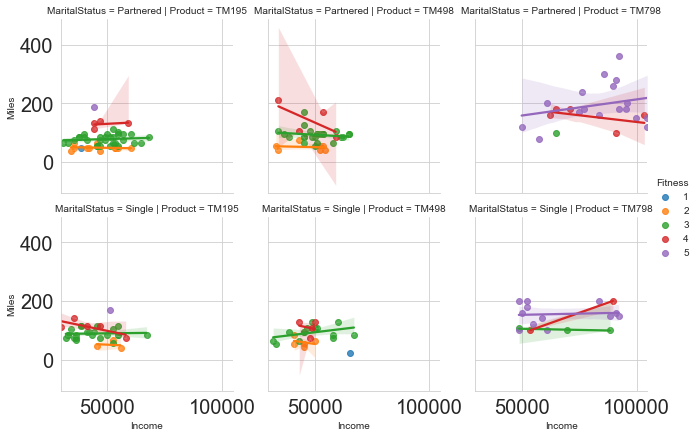

In [230]:
# Exploring the correlation of income-miles with other variables. 
sns.lmplot(x='Income',y='Miles', hue='Fitness',col='Product',row='MaritalStatus',data=cardio, size=3)


## Observations
- Customers with higher income and partnered and with fitness level 4 and 5  expected to run more miles  bought TM798

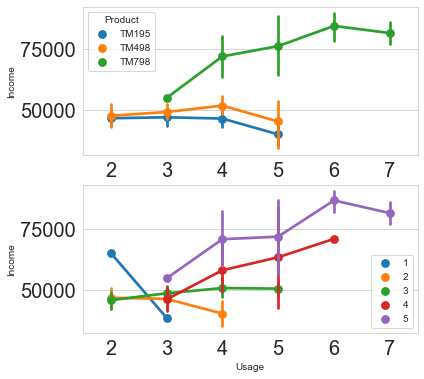

In [231]:
plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (.5, .5)}, figsize = (6,6)) # subplots for hue product and fitness
plt.subplot(2,1,1)
sns.pointplot(x='Usage',y='Income', hue='Product',data=cardio,label='Product') #wrt product
plt.subplot(2,1,2)
sns.pointplot(x='Usage',y='Income', hue='Fitness',data=cardio,label='Fitness') #wrt fitness
plt.legend(frameon=True)

## Observations:
- Customers with high income and who intend to use the product more number of times a week prefer TM798 over other two products
- Customers with high income and high fitness level are likely to use the product more number of times a week than the other two products 

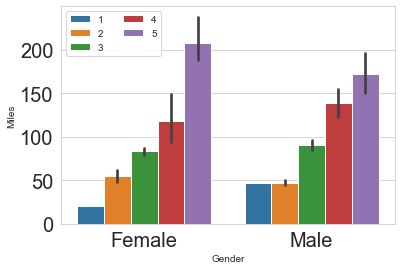

In [232]:
# miles vs gender for different fitness levels
sns.barplot(x='Gender',y='Miles', hue='Fitness',data=cardio)
plt.legend(ncol=2,frameon=True)

### It is also good to create a pandas profiling report

In [233]:
#import pandas_profiling
import pandas_profiling 
pandas_profiling.ProfileReport(cardio)

# Conclusions:
#### Following points were concluded from customer profile, bivariate and univariate analyses of the data:
- Customers choose products based on specific ideas. Characteristics such as Fitness level, income, gender & marital status guide their choices
- There are 3 different products TM195, TM498 and TM798. Highest number of customers prefer TM195 and least for TM798
- Most of the customers are of fitness level 3. While TM195 is used irrespective of the fitness level, TM798 is only used by customers with fitness levels 3-5 and TM498 from levels 1 to 4.
- Customers who are ‘partnered’ buy products more than those who are ‘single’
- Age does not seem to have an influence on the preference of the products bought by the customers
- Customers who wish to use max of 5 times per work buy either TM195 or TM498 and for 7 times per week max, they buy TM798
- Customers with higher income and partnered and with fitness level 4 and 5 expected to run more miles bought TM798. 
    - TM798 may possibly have the highest price among the three products 
- Customers who expect to run more miles bought TM798 compared to the other two.
- Based on gender: For TM498, female customers plan to use the product more times per week than male customers. More male customers buy TM798 than female customers. 
- TM798 is often purchased by:
    - Female customers with high fitness level, more # yrs education, more income, who plan to use the product more and are expected to run more miles 
    - Male customers with fitness level 4 and 5, a greater number of years of education and more income who plan to use the product and expected to run more miles
    
# Recommendations or marketing guidelines to the store:

- Recommendation of products to be given based on the customer’s fitness levels and usage
- Customers who expect to use the product more invest on TM798. This product is also bought by customers with high income. Hence, marketing can be done more to promote this item for customers with fitness level 3 and above
- Since TM195 is bought by maximum number of customers and in any category, the store can ensure the stock of this product 
- Based on the customer preferences: since products TM498 and TM195 are not much different, it would be good to implement some strategies to categorize it further


